In [253]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling as pp

### Original atts:
age; sex (1,0); cp (1-4); trestbps; chol; fbs (1,0); restecg (0,1,2); thalach; exang (1,0); oldpeak; slope (1,2,3); ca; thal (3,6,7); class att: 0 is healthy, 1,2,3,4 is sick.

In [272]:
hd = pd.read_csv('../data/processed.cleveland.data', header=None)
hd.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate_achieved", "exercise_induced_angina", "ST_depression_induced_by_exercise", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]

# TODO: Ask Bernat at what point do we split off our data for testing? Do we need to run our test data through pre-processing "on it's own"? If using jupyter, this means I am passing the data through the same statements as before, seems redundant and unnecessary.
hd.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,major_vessels_count,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [273]:
hd.shape

(303, 14)

In [274]:
hd.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [275]:
hd.dtypes

age                                  float64
sex                                  float64
chest_pain_type                      float64
resting_blood_pressure               float64
cholesterol                          float64
fasting_blood_sugar                  float64
resting_electrocardiographic         float64
max_heart_rate_achieved              float64
exercise_induced_angina              float64
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope               float64
major_vessels_count                   object
thalassemia                           object
target                                 int64
dtype: object

In [276]:
# profile = pp.ProfileReport(hd, title="Profile Report of Heart Disease Dataset")
# profile.to_file("../data/processed/hd_data_profile.html")

In [277]:

objectAttributesKey = ["sex", "chest_pain_type", "fasting_blood_sugar", "resting_electrocardiographic", "exercise_induced_angina", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "exercise_induced_st_depression", "target"]
objectAttributes = {i: "object" for i in objectAttributesKey}

integerAttributesKey = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "ST_depression_induced_by_exercise"]
integerAttributes = {i: "float" for i in integerAttributesKey}

attributeTypes = objectAttributes | integerAttributes
hd=hd.astype(attributeTypes)

hd.dtypes

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'exercise_induced_st_depression' not found in columns."

In [ ]:
hd.dtypes

In [278]:
hd["target"] = hd["target"].replace([0,1,2,3,4],["Healthy", "Sick","Sick","Sick", "Sick"])

# hd.loc[hd.target == "2"] = "Sick"
# hd.loc[hd.target == "3"] = "Sick"
# hd.loc[hd.target == "4"] = "Sick"
# hd.loc[hd.target == "1"] = "Healthy"
# hd['target'].value_counts()

In [279]:
hd.describe()
hd.dtypes

age                                  float64
sex                                  float64
chest_pain_type                      float64
resting_blood_pressure               float64
cholesterol                          float64
fasting_blood_sugar                  float64
resting_electrocardiographic         float64
max_heart_rate_achieved              float64
exercise_induced_angina              float64
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope               float64
major_vessels_count                   object
thalassemia                           object
target                                object
dtype: object

In [280]:
hd.describe(include="float")

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [281]:
hd.describe(include="object")
hd.head

<bound method NDFrame.head of       age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0    63.0  1.0              1.0                   145.0        233.0   
1    67.0  1.0              4.0                   160.0        286.0   
2    67.0  1.0              4.0                   120.0        229.0   
3    37.0  1.0              3.0                   130.0        250.0   
4    41.0  0.0              2.0                   130.0        204.0   
..    ...  ...              ...                     ...          ...   
298  45.0  1.0              1.0                   110.0        264.0   
299  68.0  1.0              4.0                   144.0        193.0   
300  57.0  1.0              4.0                   130.0        131.0   
301  57.0  0.0              2.0                   130.0        236.0   
302  38.0  1.0              3.0                   138.0        175.0   

     fasting_blood_sugar  resting_electrocardiographic  \
0                    1.0                       

# Taking Care of missing data

In [282]:
print(hd.shape)
hd1=hd.dropna()
print(hd1.shape)

(303, 14)
(303, 14)


# Finding Outliers

We will take a look at the 1.5*IQR and visualize with boxplots to see if there are any outliers we need to deal with.
Boxplots will be plotted against our tagert value of healthy and unhealthy to start seeing if there is any correlation between our numerical attributes and target variable.

In [283]:
hd_data = hd.iloc[:, :-1].values
hd_target = hd.iloc[:, -1].values

age lower and upper 1.5*IQR and values outside this range is: 
 lower: 28.5	upper: 80.5 
value count: 0
resting_blood_pressure lower and upper 1.5*IQR and values outside this range is: 
 lower: 90.0	upper: 170.0 
value count: 9
cholesterol lower and upper 1.5*IQR and values outside this range is: 
 lower: 115.0	upper: 371.0 
value count: 5
max_heart_rate_achieved lower and upper 1.5*IQR and values outside this range is: 
 lower: 84.75	upper: 214.75 
value count: 1
ST_depression_induced_by_exercise lower and upper 1.5*IQR and values outside this range is: 
 lower: -2.4000000000000004	upper: 4.0 
value count: 5


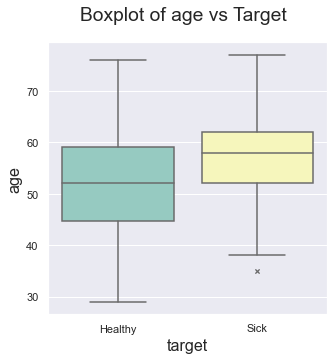

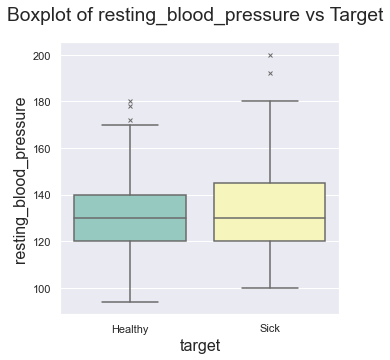

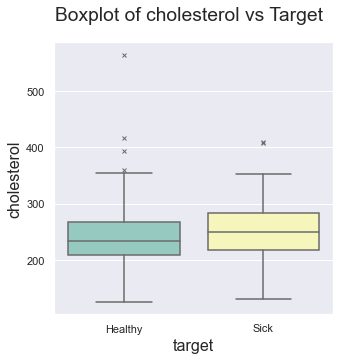

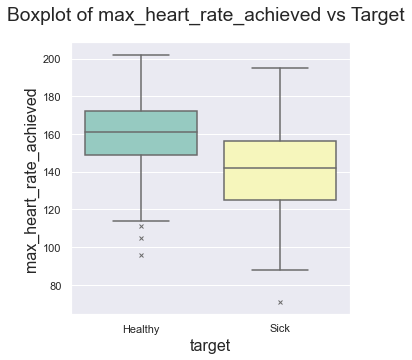

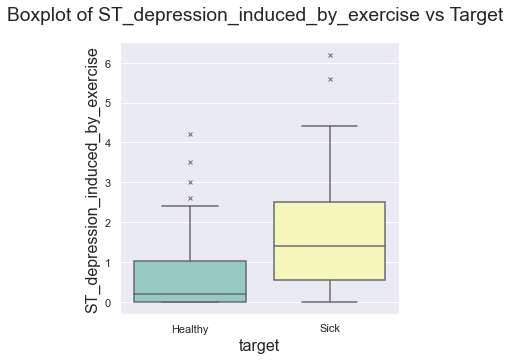

In [284]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_context(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
for i in integerAttributesKey:
    plt.figure(i)
    sns.boxplot(x="target", y=i, data=hd, orient="v", palette="Set3", flierprops = dict(marker="x", markersize = 4))
    plt.suptitle(f"Boxplot of {i} vs Target")

    # Print IQR and ceiling floor values
    Q1 = hd[i].quantile(0.25)
    Q3 = hd[i].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR
    number_of_outliers = hd[i][(hd[i] < low_outliers) | (hd[i] > upper_outliers)].count()
    print(f'{i} lower and upper 1.5*IQR and values outside this range is: \n lower: {low_outliers}\tupper: {upper_outliers} \nvalue count: {number_of_outliers}')

### Outlier Decision
Based on these results, there are not many outlier values. Given the box plot visualizations, the outliers are not deemed to be noise and will not be removed from the dataset.

We can also see a potential that:
- age and resting heart rate seem correlated with heart disease
- higher max heart rate is associated with individuals without heart diseases
- cholesterol doesn't have a significant impact

# Initial Visualizations
We can take a look at some visualizations to see if there are some interesting trends or hypothesis we can test. This will also give us an idea of which models we might want to test and which attributes we expect to have the most impact on our target.

From looking at the boxplots, we also know that our data is in different ranges and we will need to consider applying a normalization depending on the model we choose. We will do that later once we know which models we will try to run.


## Continuous Variables
We'll add some scatterplots and histograms to continue analyzing our numerical data.

Text(0.5, 0.98, 'Pairwise Relationship Plots of Numerical Values - Target')

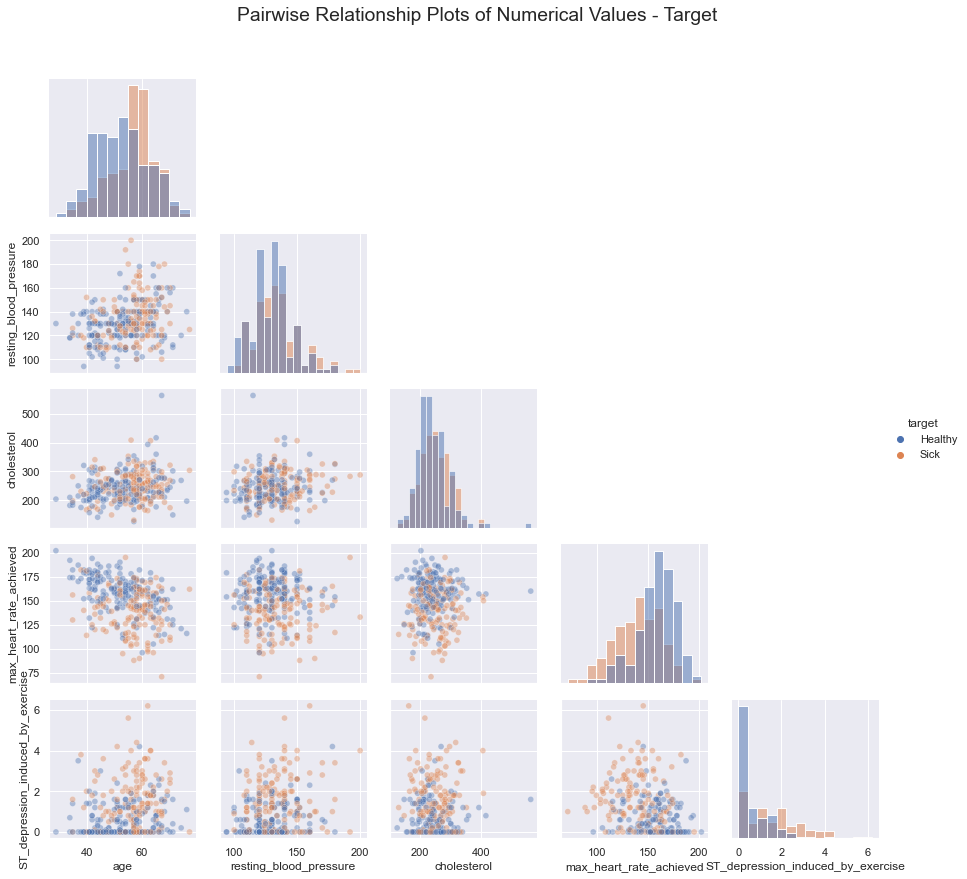

In [285]:
sns.set_context(rc={"font.size":16,"axes.titlesize":12,"axes.labelsize":12})
pairwise_viz = sns.PairGrid(hd, vars=integerAttributesKey, hue="target", diag_sharey=False, corner=True)
pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_viz.map_diag(sns.histplot)
pairwise_viz.add_legend()
pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Target")

It looks like there are a lot of individuals that had no ST depression induced by exercise (value of 0). It might be interesting to see how the target responds to those and without this value present. Let's dive into that.


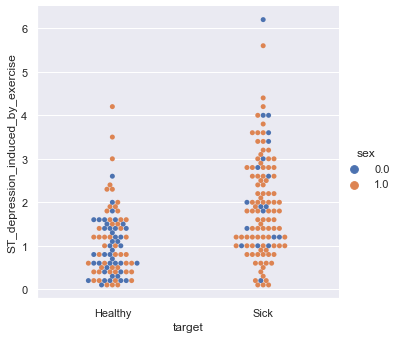

In [330]:
sns.catplot(x="target", y="ST_depression_induced_by_exercise", kind="swarm", hue="sex", data=hd[hd["ST_depression_induced_by_exercise"] != 0])

<AxesSubplot:xlabel='target', ylabel='count'>

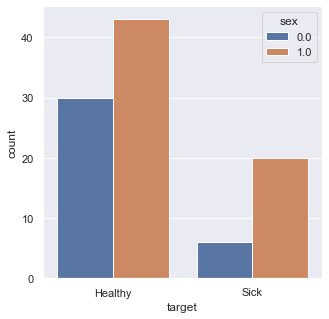

In [327]:
sns.countplot(x="target", hue="sex", data=hd[hd["ST_depression_induced_by_exercise"] == 0.0])

It looks like non-zero levels of ST depression induced by exercise are more prevalent in males, and those that have higher values have a greater tendency to have heart disease. We can also see that males with zero values have a greater chance of heart disease. Let's see what the absolute impact of sex on heart disease is.

<AxesSubplot:xlabel='target', ylabel='Density'>

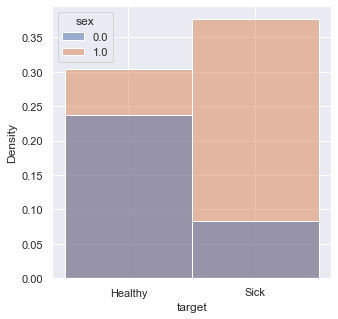

In [343]:
sns.histplot(x="target", stat="density", hue="sex", data=hd)

It looks like our data is generally showing that males are more likely to be sick than females.


We can take a look to see if we see any other interesting differences between males and females.
Although nothing jumps out at us, it does look like there is a bit of a "binning" of data for the resting blood pressure. We won't do anything about it at the moment. This may be a result of different methods of collecting blood pressure that resulted in a different level of precision.

Text(0.5, 0.98, 'Pairwise Relationship Plots of Numerical Values - Sex')

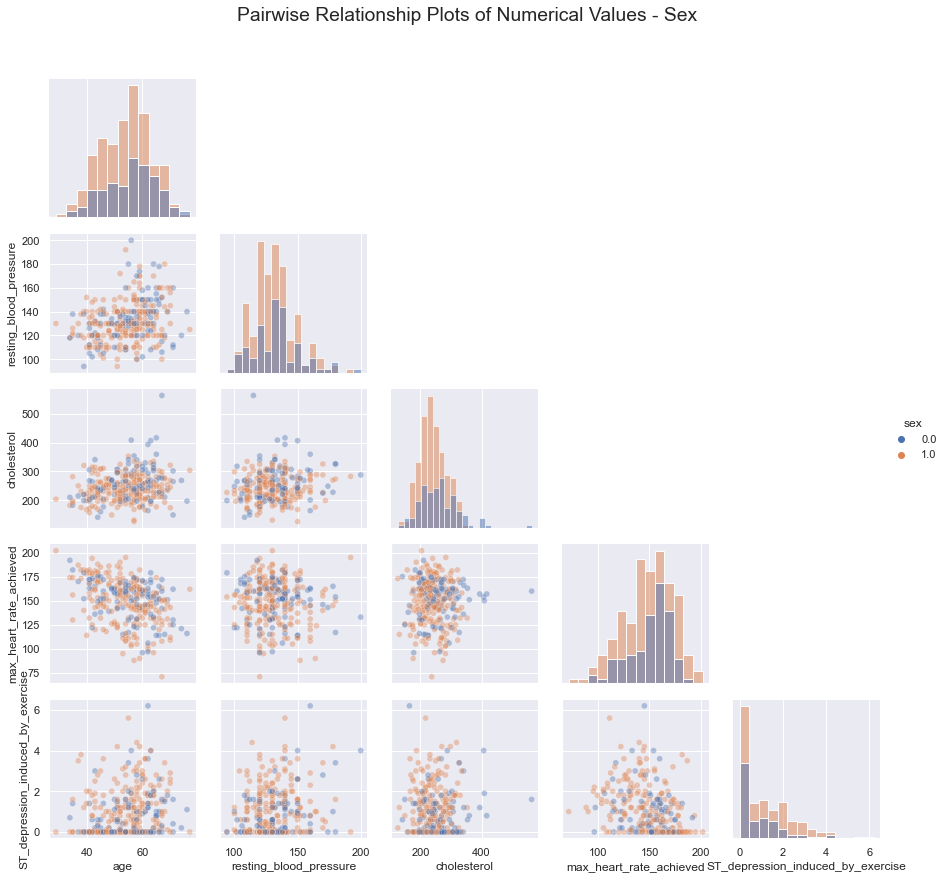

In [344]:
pairwise_viz = sns.PairGrid(hd, vars=integerAttributesKey, hue="sex", diag_sharey=False, corner=True)
pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_viz.map_diag(sns.histplot)
pairwise_viz.add_legend()
pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Sex")

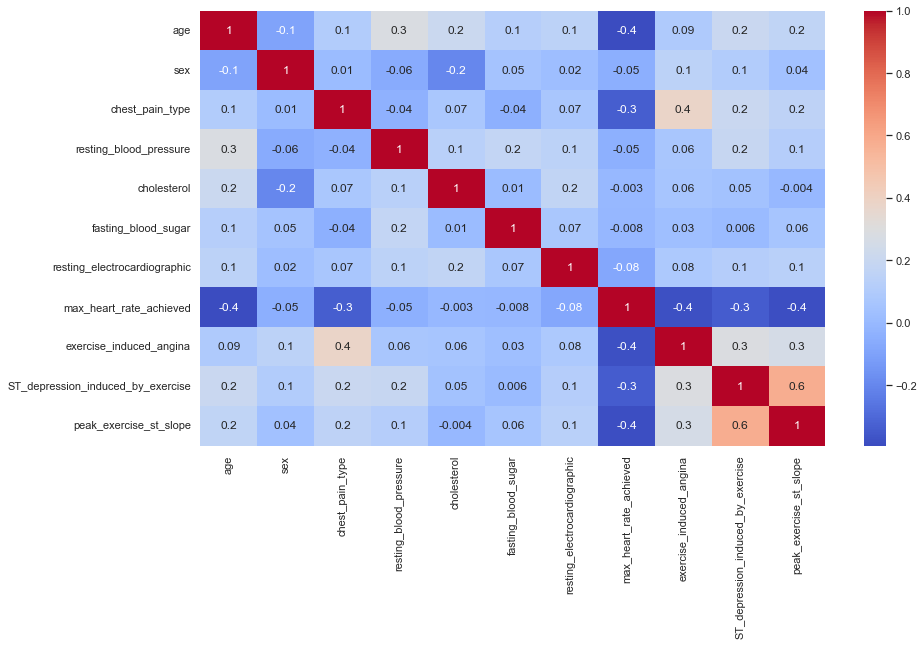

In [348]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = hd.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

<Figure size 360x360 with 0 Axes>

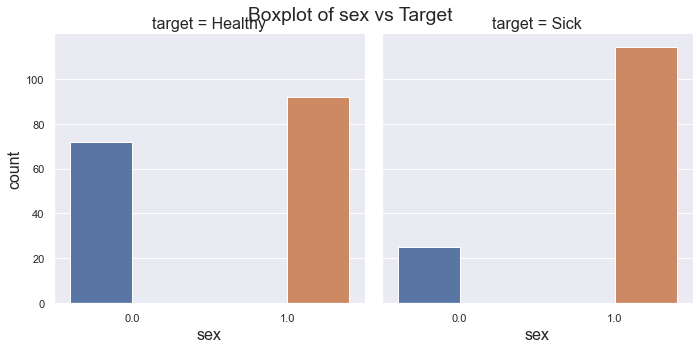

<Figure size 360x360 with 0 Axes>

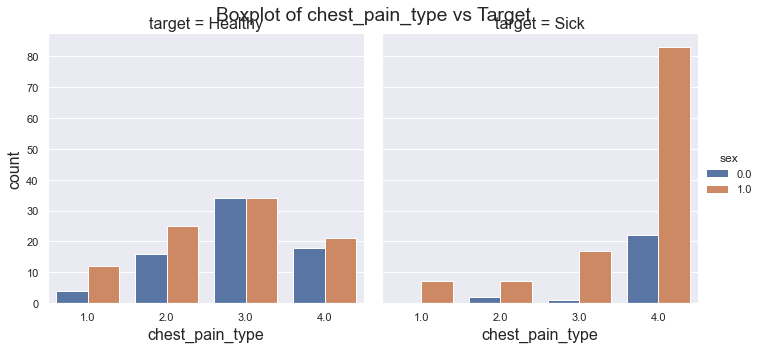

<Figure size 360x360 with 0 Axes>

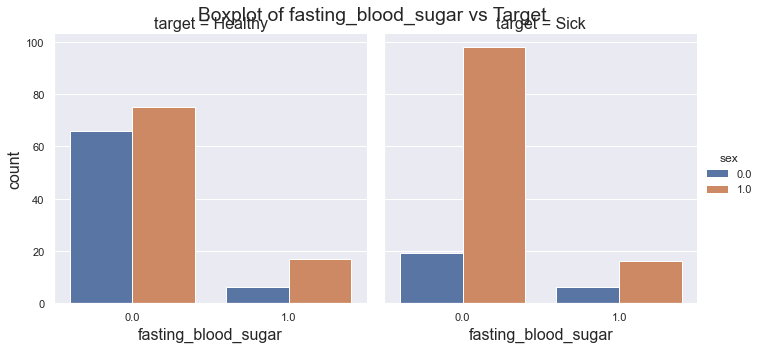

<Figure size 360x360 with 0 Axes>

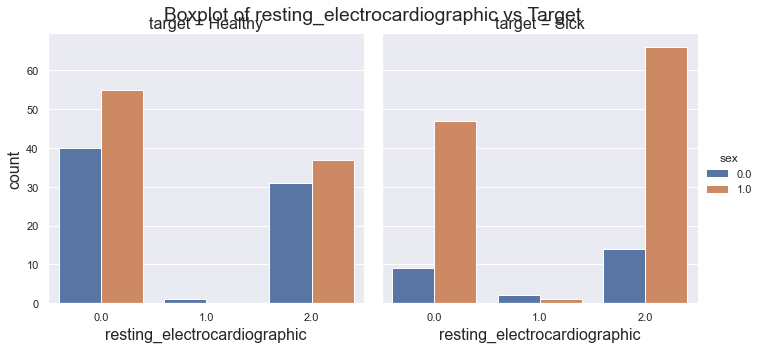

<Figure size 360x360 with 0 Axes>

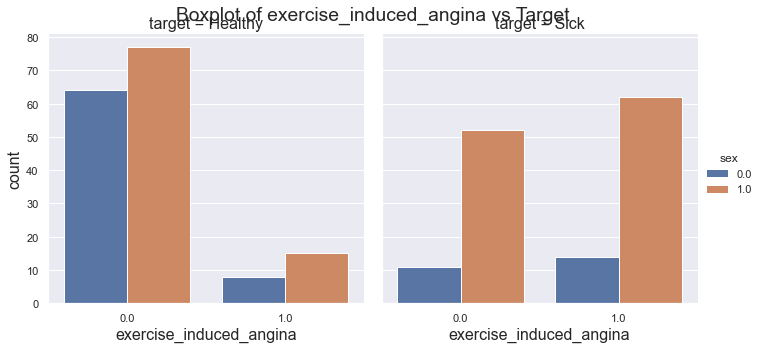

<Figure size 360x360 with 0 Axes>

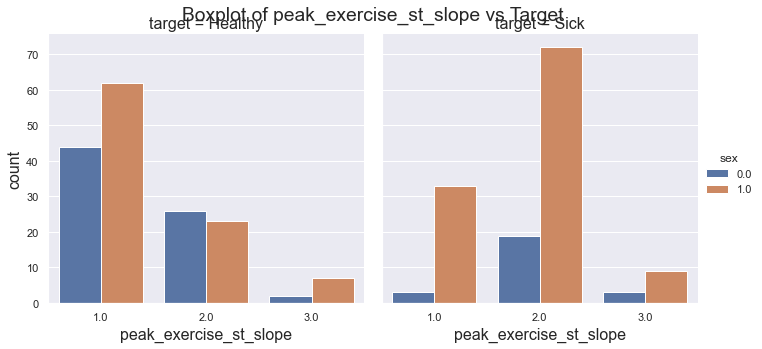

<Figure size 360x360 with 0 Axes>

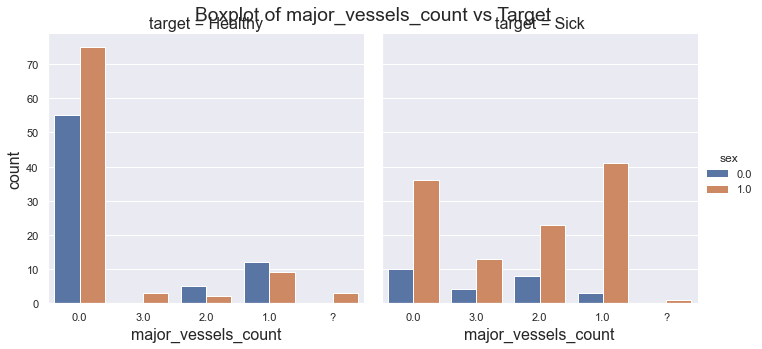

<Figure size 360x360 with 0 Axes>

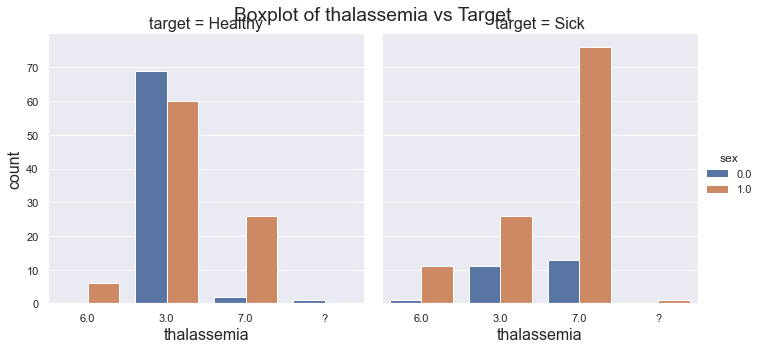

<Figure size 360x360 with 0 Axes>

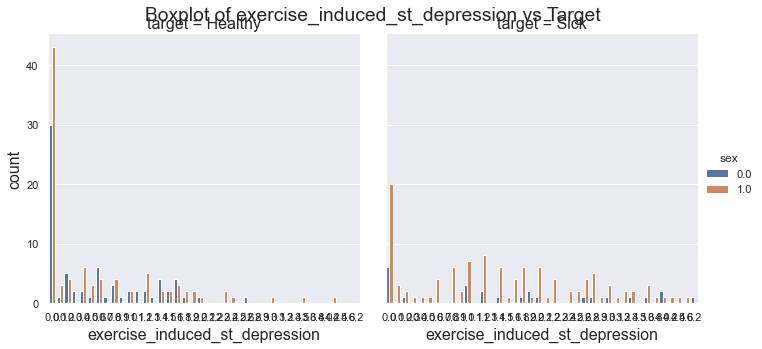

<Figure size 360x360 with 0 Axes>

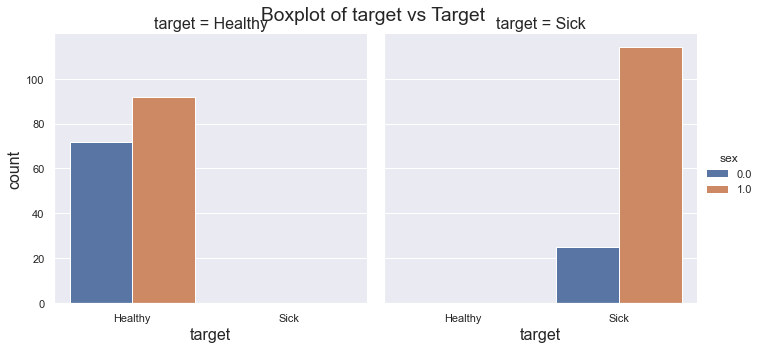

In [250]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_context(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
for i in objectAttributes:
    plt.figure(i)
    sns.catplot(x=i, kind="count", hue="sex", col="target", data=hd)
    plt.suptitle(f"Boxplot of {i} vs Target")


# Visualization


Healthy    164
Sick       139
Name: target, dtype: int64


<AxesSubplot:>

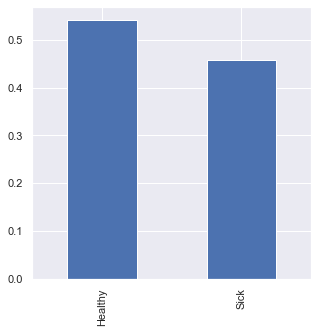

In [203]:
print(hd['target'].value_counts())
hd.target.value_counts(normalize=True).plot(kind='bar')


<AxesSubplot:>

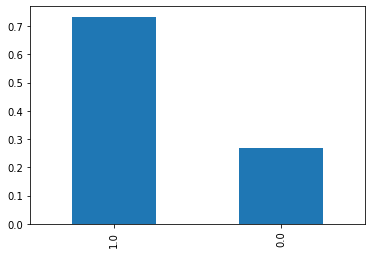

In [100]:
hd.sex.value_counts(normalize=True).plot(kind='bar')

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

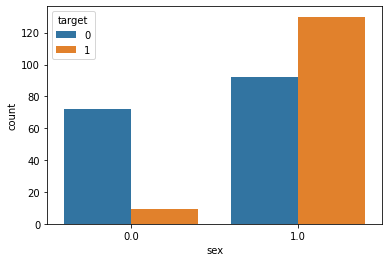

In [101]:
sns.countplot('sex', data=hd, hue='target')

# Fast Visualization

# Description of the attributes
1. age - age in years 

2. sex - (1 = male; 0 = female) 

3. cp - chest pain type 

0: Typical angina: chest pain related decrease blood supply to the heart 

1: Atypical angina: chest pain not related to heart 

2: Non-anginal pain: typically esophageal spasms (non heart related) 

3: Asymptomatic: chest pain not showing signs of disease 

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern 

5. chol - serum cholestoral in mg/dl 

serum = LDL + HDL + .2 * triglycerides 

above 200 is cause for concern 

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

'>126' mg/dL signals diabetes 

7. restecg - resting electrocardiographic results 

0: Nothing to note 

1: ST-T Wave abnormality 

can range from mild symptoms to severe problems 

signals non-normal heart beat 

2: Possible or definite left ventricular hypertrophy 

Enlarged heart's main pumping chamber 

8. thalach - maximum heart rate achieved 

9. exang - exercise induced angina (1 = yes; 0 = no) 

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more 

11. slope - the slope of the peak exercise ST segment 

0: Upsloping: better heart rate with excercise (uncommon) 

1: Flatsloping: minimal change (typical healthy heart) 

2: Downslopins: signs of unhealthy heart 

12. ca - number of major vessels (0-3) colored by flourosopy 

colored vessel means the doctor can see the blood passing through 

the more blood movement the better (no clots) 

13. thal - thalium stress result 

1,3: normal 

6: fixed defect: used to be defect but ok now 

7: reversable defect: no proper blood movement when exercising 

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute) 

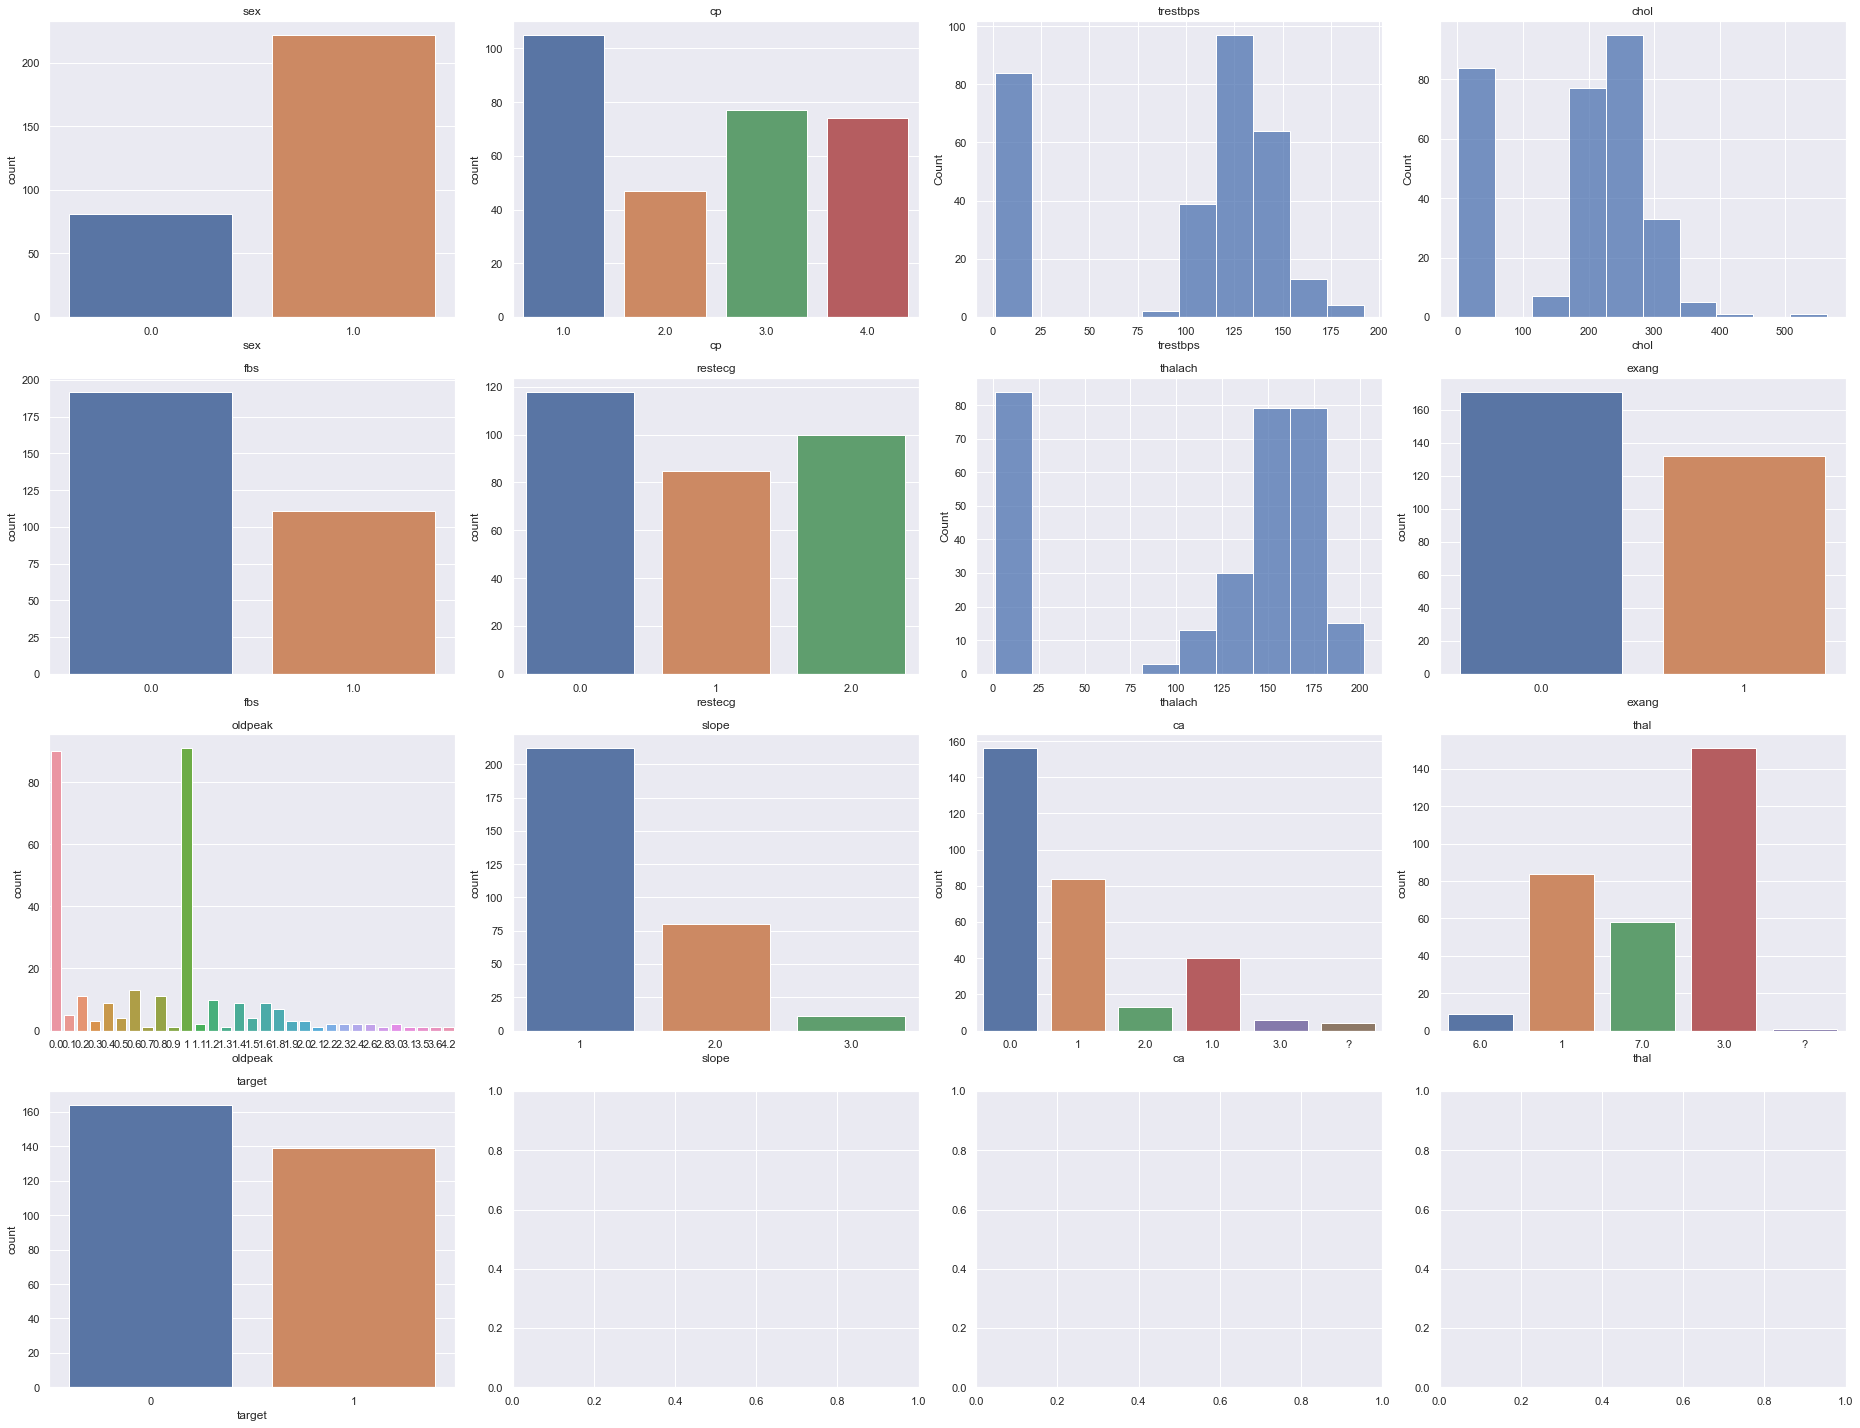

In [72]:

fig, axes = plt.subplots(4,4,figsize=(26,20))
# We will not plot country because it has too many categories.
for i, c in enumerate(hd.columns[1:]):
    ax = axes.reshape(-1)[i]
    if hd[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=hd,ax=ax)
    else:
        b = sns.histplot(x=c,data=hd,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

It looks like some attriubutes have lots of 1's. Let's explore that to see how many.

In [102]:
print((hd['thalach'] == 1).sum())
print((hd['trestbps'] == 1).sum())
print((hd['chol'] == 1).sum())
print((hd['oldpeak'] == 1).sum())

84
84
84
136


TODO: Cycle through all the attributes and compare to target using seaborn

Interesting... the first three attributes all have 84 instances where the value is "1". This may be a "missing" value.
TODO: Read about what those three attributes are, and how the testing was done to gain those values. What does the 1 mean?

Let's see how the attributes are related to target variable

In [ ]:
import matplotlib.pyplot as plt

df1 = hd.select_dtypes([np.int, np.float, np.object])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1,hue='target')
    
